In [1]:
import Data
import regression
import dclassifier
import numpy as np
import pandas as pd
import backtest
import Genetic_Algorithm_2
import matplotlib.pyplot as plt
import gplearn.genetic as gp

In [2]:
data = pd.read_csv('data/USDJPY-1016-2024.csv', sep="\\t", engine='python')

In [3]:
data

,DATE_TIME,OPEN,HIGH,LOW,CLOSE,VOLUME,SPREAD
0,2016-06-23 03:15:00,104.630,104.654,104.591,104.603,1028,4
1,2016-06-23 03:30:00,104.603,104.631,104.594,104.629,1180,5
2,2016-06-23 03:45:00,104.630,104.662,104.620,104.641,998,4
3,2016-06-23 04:00:00,104.641,104.675,104.612,104.634,1329,5
4,2016-06-23 04:15:00,104.633,104.659,104.616,104.630,1245,5
...,...,...,...,...,...,...,...
199995,2024-06-28 19:45:00,160.832,160.884,160.816,160.861,2224,4
199996,2024-06-28 20:00:00,160.861,160.940,160.861,160.877,1680,5
199997,2024-06-28 20:15:00,160.875,160.939,160.867,160.925,875,5
199998,2024-06-28 20:30:00,160.923,160.944,160.855,160.881,1017,6


In [4]:
#training_months = [pd.Period('2019-04', 'M'), pd.Period('2019-05', 'M'), pd.Period('2019-06', 'M'), pd.Period('2019-07', 'M')]
#testing_month = [pd.Period('2023-04', 'M'), pd.Period('2023-08', 'M'), pd.Period('2023-09', 'M'), pd.Period('2023-10', 'M')]
#testing_month = [pd.Period('2016-03', 'M')]
data = Data.Data()

prices = data.prices
#prices = prices[prices.index.to_period('M').isin(training_months)]

2000-01      4
2000-02     10
2000-03     46
2000-04    191
2000-05    191
          ... 
2019-11      4
2019-12     36
2020-01     24
2020-02      0
2020-03     71
Freq: M, Length: 243, dtype: int64


In [5]:
training_months = [pd.Period('2016-05', 'M'), pd.Period('2016-06', 'M'), pd.Period('2016-07', 'M'), pd.Period('2016-08', 'M'), pd.Period('2016-09', 'M'), pd.Period('2016-10', 'M'), pd.Period('2016-11', 'M'), pd.Period('2016-12', 'M'), pd.Period('2017-01', 'M'), pd.Period('2017-02', 'M')]
for i in training_months:
    price_tmp = prices[prices.index.to_period('M').isin([i])]
    print(price_tmp.empty)

False
False
False
False
False
True
True
True
True
False


In [6]:
prices

DATE_TIME,EURCHF,EURJPY,EURUSD,USDCAD,USDCHF,USDJPY
2005-06-01 00:00:00,1.53580,133.490,1.23080,1.25470,1.24810,108.470
2005-06-01 00:15:00,1.53570,133.490,1.23060,1.25410,1.24800,108.490
2005-06-01 00:30:00,1.53580,133.440,1.23100,1.25420,1.24780,108.420
2005-06-01 00:45:00,1.53550,133.450,1.23060,1.25420,1.24780,108.440
2005-06-01 01:00:00,1.53570,133.430,1.23050,1.25440,1.24800,108.400
...,...,...,...,...,...,...
2020-02-28 22:45:00,1.06496,119.074,1.10377,1.34219,0.96492,107.877
2020-02-28 23:00:00,1.06459,118.972,1.10282,1.34182,0.96535,107.883
2020-02-28 23:15:00,1.06451,119.066,1.10309,1.34147,0.96504,107.940
2020-02-28 23:30:00,1.06528,119.137,1.10314,1.33958,0.96571,107.998


In [10]:
thresholds = np.arange(0.0001, 0.0010, 0.0001)
currencies = ['EURCHF']

combinations = [(threshold, currency) for threshold in thresholds for currency in currencies]

losses = {}
best_individual = {}
threshold, currency = (0.005, 'EURCHF')

events, dcclass, dc_Events = dclassifier.classify_split_timeseries(prices[currency], threshold)
DCs_with_OSs = [([a['end'] - a['start'], a['event_price'], a['speed']], b['start'] - a['end']) for (_, a), (_, b) in zip(events.iloc[:-1].iterrows(), events.iloc[1:].iterrows()) if b['prev_os']]
#DCs_with_OSs = [(a['end'] - a['start'], b['start'] - a['end']) for (_, a), (_, b) in zip(events.iloc[:-1].iterrows(), events.iloc[1:].iterrows()) if b['prev_os']]

In [11]:
DCs_with_OSs

[([233, 0.00770000000000004, 0.0033047210300429356], 200),
 ([22, -0.5578700000000001, 2.535772727272728], 7),
 ([6, 0.004989999999999939, 0.08316666666666564], 12),
 ([3, 0.008960000000000079, 0.2986666666666693], 2),
 ([2, -0.00537999999999994, 0.268999999999997], 4),
 ([1, 0.006060000000000065, 0.6060000000000065], 47),
 ([50, -0.007460000000000022, 0.014920000000000046], 22),
 ([3, 0.006420000000000092, 0.21400000000000308], 1),
 ([11, -0.00537999999999994, 0.04890909090909037], 80),
 ([1, 0.006190000000000029, 0.6190000000000029], 3),
 ([7, -0.005319999999999991, 0.07599999999999987], 8),
 ([21, 0.005070000000000019, 0.024142857142857233], 5),
 ([8, -0.005950000000000011, 0.07437500000000014], 9),
 ([5, 0.005729999999999902, 0.11459999999999804], 2),
 ([8, -0.005179999999999962, 0.06474999999999953], 5),
 ([6, 0.007830000000000004, 0.13050000000000006], 3),
 ([3, -0.005669999999999953, 0.18899999999999845], 76),
 ([10, 0.005659999999999998, 0.05659999999999999], 7),
 ([22, -0.0060

In [12]:
DCs_up = []
OS_up = []
DCs_down=[]
OS_down = []
for x in DCs_with_OSs:
    if x[1] == 0:
        continue
    if x[0][1] > 0:
        DCs_up.append(x[0]['event_time'])
        OS_up.append(x[1])
    else:
        DCs_down.append(x[0]['event_time'])
        OS_down.append(x[1])
""" DCs = [(x[0] if x[0]['event_price'] > 0 else continue) for x in DCs_with_OSs]
DCs """

TypeError: list indices must be integers or slices, not str

In [16]:
DCs = [x[0] for x in DCs_with_OSs]
OSs = [x[1] for x in DCs_with_OSs]
X_train = pd.DataFrame(DCs, columns=['time'])
Y_train = pd.Series(OSs)

In [21]:
X_train
Y_train

0      152
1       18
2      117
3       18
4     1054
5      127
6      282
7      666
8      489
9        3
10      56
11     174
12       2
13     135
14    1560
15     118
dtype: int64

In [19]:
est_gp = gp.SymbolicRegressor(population_size=5000,
                           generations=20, stopping_criteria=0.01,
                           p_crossover=0.7, p_subtree_mutation=0.1,
                           p_hoist_mutation=0.05, p_point_mutation=0.1,
                           max_samples=0.9, verbose=1,
                           parsimony_coefficient=0.01, random_state=0)

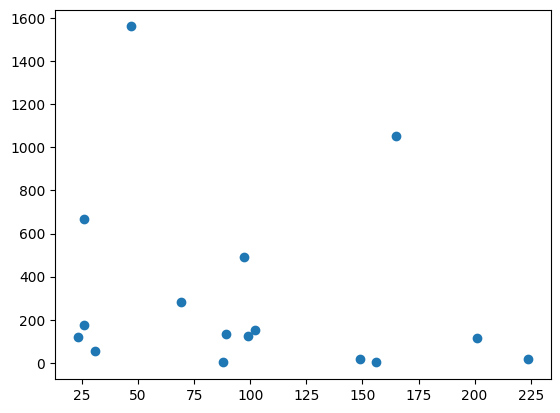

In [23]:
#est_gp.fit(X_train, Y_train)
xs = [x[0] for x in DCs_with_OSs]
ys = [x[1] for x in DCs_with_OSs]

plt.scatter(xs, ys)

In [19]:
print(est_gp._program)

sub(mul(0.232, add(X0, add(mul(0.089, X0), mul(0.089, X0)))), div(-0.587, 0.071))


The original time series plot 'EUR-CHF Time Series' has been generated.
DC variables computation has finished.
The indicator feature space plot 'EUR-CHF Time Series' has been generated.
The event data file 'EURCHF-2019 Event Data.csv' has been generated.
The plot 'Annotated EUR-CHF September 2019 Time Series' has been generated.


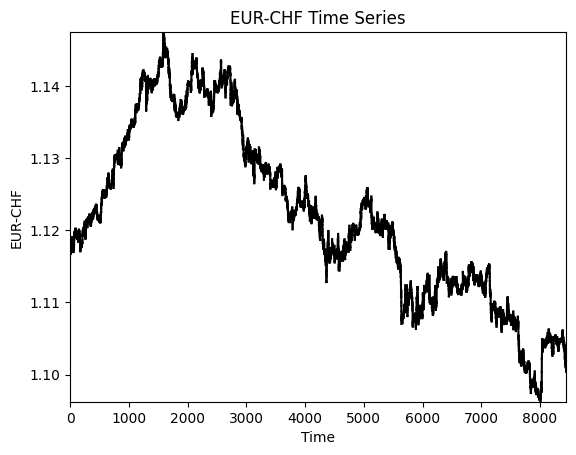

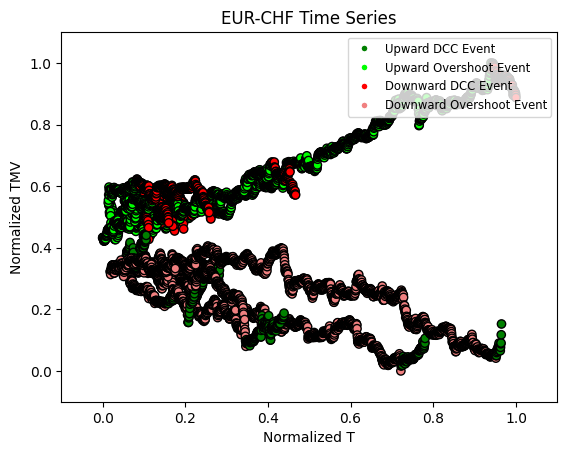

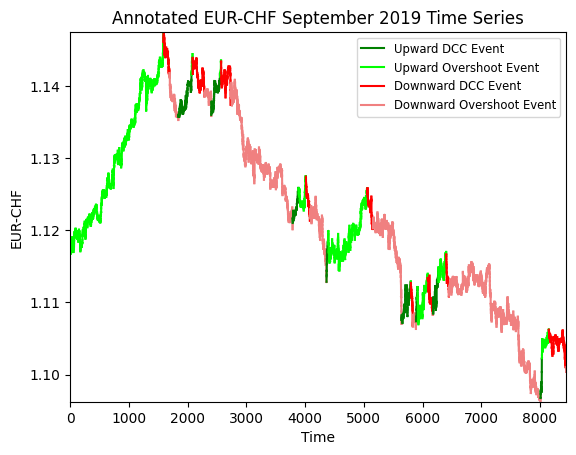

In [12]:
import matplotlib.animation as animation
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd



class dc_calculator():
	def __init__(self):
		self.prices = None
		self.time = None
		self.TMV_list = []
		self.T_list = []
		self.colors = []
		self.events = []



	def compute_dc_variables(self, threshold: float = 0.01):
		"""

		Method to compute all relevant DC parameters.

		"""

		if self.prices is None:
			print('Please load the time series data first before proceeding with the DC parameters computation')
		else:
			self.TMV_list = []
			self.T_list = []
			self.colors = []
			self.events = []

			ext_point_n = self.prices[0]
			curr_event_max = self.prices[0]
			curr_event_min = self.prices[0]
			time_point_max = 0
			time_point_min = 0
			trend_status = 'up'
			T = 0

			for i in range(len(self.prices)):
				TMV = (self.prices[i] - ext_point_n) / (ext_point_n * threshold)
				self.TMV_list.append(TMV)
				self.T_list.append(T)
				T += 1

				if trend_status == 'up':
					self.colors.append('lime')
					self.events.append('Upward Overshoot')

					if self.prices[i] < ((1 - threshold) * curr_event_max):
						trend_status = 'down'
						curr_event_min = self.prices[i]

						ext_point_n = curr_event_max
						T = i - time_point_max

						num_points_change = i - time_point_max
						for j in range(1, num_points_change + 1):
							self.colors[-j] = 'red'
							self.events[-j] = 'Downward DCC'
					else:
						if self.prices[i] > curr_event_max:
							curr_event_max = self.prices[i]
							time_point_max = i
				else:
					self.colors.append('lightcoral')
					self.events.append('Downward Overshoot')

					if self.prices[i] > ((1 + threshold) * curr_event_min):
						trend_status = 'up'
						curr_event_max = self.prices[i]

						ext_point_n = curr_event_min			
						T = i - time_point_min

						num_points_change = i - time_point_min
						for j in range(1, num_points_change + 1):
							self.colors[-j] = 'green'
							self.events[-j] = 'Upward DCC'
					else:
						if self.prices[i] < curr_event_min:
							curr_event_min = self.prices[i]
							time_point_min = i

			self.colors = np.array(self.colors)

			print('DC variables computation has finished.')



	def generate_event_data(self, output_csv_name: str):
		"""

		Method to write the detected events for each 
		point in the time series data to a .csv file
		for external analysis. Again, feel free to 
		modify this method according to your needs.

		"""

		if isinstance(self.colors, list):
			print('Please load the time series data and compute DC variables first before attempting to generate the event data.')
		else:
			df = pd.DataFrame({'Time': self.time, 'Rate': self.prices, 'Event': np.array(self.events)})
			df.to_csv(output_csv_name + '.csv', index = False)

			print("The event data file '" + output_csv_name + ".csv' has been generated.")



	def generate_indicator_space_plot(self, title: str, output_plot_name = None):
		"""
	
		Method to generate the normalized TMV against normalized T indicator- 
		space plot after the DC parameters have been computed. This method
		currently uses the detected event class to colour the points, and it
		should be modified accordingly if one wishes to colour the points
		according to the detected regime as described in the book.

		"""

		if len(self.TMV_list) == 0:
			print('Please load the time series data and compute the DC variables before attempting to plot the indicator feature space.')
		else:
			TMV_array = np.array(self.TMV_list)
			T_array = np.array(self.T_list)
			norm_TMV = (TMV_array - np.min(TMV_array)) / (np.max(TMV_array) - np.min(TMV_array))
			norm_T = (T_array - np.min(T_array)) / (np.max(T_array) - np.min(T_array))

			fig, ax = plt.subplots()
			ax.scatter(norm_T, norm_TMV, c = self.colors, edgecolors = 'k')
			legend_elements = [plt.Line2D([0], [0], marker = 'o', color = 'w', markerfacecolor = 'green', markersize = 5, label = 'Upward DCC Event'),
							   plt.Line2D([0], [0], marker = 'o', color = 'w', markerfacecolor = 'lime', markersize = 5, label = 'Upward Overshoot Event'),
							   plt.Line2D([0], [0], marker = 'o', color = 'w', markerfacecolor = 'red', markersize = 5, label = 'Downward DCC Event'),
							   plt.Line2D([0], [0], marker = 'o', color = 'w', markerfacecolor = 'lightcoral', markersize = 5, label = 'Downward Overshoot Event')]
			ax.legend(handles = legend_elements, loc = 'upper right', fontsize = 'small')
			ax.set_xlim(np.min(norm_T) - 0.1, np.max(norm_T) + 0.1)
			ax.set_ylim(np.min(norm_TMV) - 0.1, np.max(norm_TMV) + 0.1)
			ax.set_title(title)
			ax.set_xlabel('Normalized T')
			ax.set_ylabel('Normalized TMV')
			if output_plot_name is not None and isinstance(output_plot_name, str):
				plt.savefig(output_plot_name + '.jpg')
			else:
				plt.show()

			print("The indicator feature space plot '" + title + "' has been generated.")



	def generate_original_time_series_plot(self, title: str, x_axis_label: str, y_axis_label: str, output_plot_name = None):
		"""

		Method to plot out the original time series data with no event
		annotation for visualization purpose. If output_plot_name is 
		supplied, then it is assumed that the plot should be written to
		file, and the corresponding plot .jpg file will be created.

		"""

		if self.prices is None:
			print('Please load the time series data first before plotting the original time series data.')
		else:
			fig2, ax2 = plt.subplots()
			ax2.ticklabel_format(style = 'plain', axis = 'y', useOffset = False)
			for i in range(len(self.prices)):
				ax2.plot(self.time[i : i + 2], self.prices[i : i + 2], color = 'black')
			ax2.set_xlim(0, len(self.prices) - 1)
			ax2.set_ylim(self.prices.min() * 0.9999, self.prices.max() * 1.0001)
			ax2.set_title(title)
			ax2.set_xlabel(x_axis_label)
			ax2.set_ylabel(y_axis_label)
			if output_plot_name is not None and isinstance(output_plot_name, str):
				plt.savefig(output_plot_name + '.jpg')
			else:
				plt.show()
			
			print("The original time series plot '" + title + "' has been generated.")



	def generate_time_series_animation(self, title: str, x_axis_label: str, y_axis_label: str, fps: int = 60, output_gif_name = None):
		"""
		
		Method to generate the event-annotated time series animation GIF after the DC parameters have been computed.

		"""
		if isinstance(self.colors, list):
			print('Please load the time series data and compute DC variables first before attempting to generate the time series animation.')
		else:
			green_patch = plt.Line2D([0], [0], color = 'green', label = 'Upward DCC Event')
			lime_patch = plt.Line2D([0], [0], color = 'lime', label = 'Upward Overshoot Event')
			red_patch = plt.Line2D([0], [0], color = 'red', label = 'Downward DCC Event')
			lightcoral_patch = plt.Line2D([0], [0], color = 'lightcoral', label = 'Downward Overshoot Event')

			fig, ax = plt.subplots()
			ax.ticklabel_format(style = 'plain', axis = 'y', useOffset = False)
			lines = [ax.plot([], [], color = color)[0] for color in self.colors]
			ax.set_xlim(0, len(self.prices) - 1)
			ax.set_ylim(self.prices.min() * 0.9999, self.prices.max() * 1.0001)
			ax.set_title(title)
			ax.set_xlabel(x_axis_label)
			ax.set_ylabel(y_axis_label)
			ax.legend(handles = [green_patch, lime_patch, red_patch, lightcoral_patch], loc = 'upper right', fontsize = 'small')



			def init():
				for line in lines:
					line.set_data([], [])
				return lines



			def update(i):
				if i == 0:
					return lines
				else:
					lines[i - 1].set_data(self.time[i - 1 : i + 1], self.prices[i - 1 : i + 1])
				return lines



			ani = animation.FuncAnimation(fig, update, frames = len(self.prices), init_func = init, blit = True)
			if output_gif_name is not None and isinstance(output_gif_name, str):
				ani.save(output_gif_name + '.gif', writer = 'pillow', fps = fps)
			else:
				plt.show()

			print("The animation '" + title + "' has been generated.")



	def generate_time_series_plot(self, title: str, x_axis_label: str, y_axis_label: str, output_plot_name = None):
		"""
		
		Method to generate the event-annotated time series plot after the DC parameters have been computed.

		"""

		if isinstance(self.colors, list):
			print('Please load the time series data and compute DC variables first before attempting to generate the time series plot.')
		else:
			green_patch = plt.Line2D([0], [0], color = 'green', label = 'Upward DCC Event')
			lime_patch = plt.Line2D([0], [0], color = 'lime', label = 'Upward Overshoot Event')
			red_patch = plt.Line2D([0], [0], color = 'red', label = 'Downward DCC Event')
			lightcoral_patch = plt.Line2D([0], [0], color = 'lightcoral', label = 'Downward Overshoot Event')

			fig1, ax1 = plt.subplots()
			ax1.ticklabel_format(style = 'plain', axis = 'y', useOffset = False)
			for i, color in enumerate(self.colors):
				ax1.plot(self.time[i : i + 2], self.prices[i : i + 2], color = color)
			ax1.set_xlim(0, len(self.prices) - 1)
			ax1.set_ylim(self.prices.min() * 0.9999, self.prices.max() * 1.0001)
			ax1.set_title(title)
			ax1.set_xlabel(x_axis_label)
			ax1.set_ylabel(y_axis_label)
			ax1.legend(handles = [green_patch, lime_patch, red_patch, lightcoral_patch], loc = 'upper right', fontsize = 'small')
			if output_plot_name is not None and isinstance(output_plot_name, str):
				plt.savefig(output_plot_name + '.jpg')
			else:
				plt.show()

			print("The plot '" + title + "' has been generated.")



	def load_time_series_data_from_file(self, data, data_point_limit = None, currency='EURCHF'):
		"""

		Method to load the time series data from a file. Please modify this method to suit your input data format. 
		The default method assumes that the data is stored in the format of a .csv file of which the columns
		are similar to that of the historical data provided by TrueFX (visit 
		https://www.truefx.com/truefx-historical-downloads/ for more details). In addition, this method also 
		provides an option to use the kalman filter on the time series data to smoothen it first before proceeding
		with the DC parameters computation

		"""
		try:
			self.prices = data[currency].to_numpy()

			if data_point_limit is not None and data_point_limit < len(self.prices):
				self.prices = self.prices[:data_point_limit]

			self.time = np.arange(len(self.prices))

		except:
			print('Please input a valid file name, and ensure that the file contains the data in an appropriate format.')



if __name__ == '__main__':
	calc = dc_calculator()

	# Example use of the methods of the dc_calculator class object
	calc.load_time_series_data_from_file(prices,  data_point_limit = 1000000, currency='EURCHF')
	calc.generate_original_time_series_plot('EUR-CHF Time Series', 
											'Time', 'EUR-CHF', 
											output_plot_name = 'EURCHF-2019 Time Series Plot'
										   )
	calc.compute_dc_variables(threshold=0.005,)
	calc.generate_indicator_space_plot('EUR-CHF Time Series', 
									   output_plot_name = 'EURUSD-2019Indicator Feature Space Plot'
									  )
	calc.generate_event_data('EURCHF-2019 Event Data')
	calc.generate_time_series_plot('Annotated EUR-CHF September 2019 Time Series', 
								    'Time', 'EUR-CHF', 
								    output_plot_name = 'Annotated EURCHF-2019 Plot'
								   )
	#calc.generate_time_series_animation('Annotated EUR-CHF September 2019 Time Series Animation', 
	#							   		 'Time', 'EUR-CHF', 
	#							   		 output_gif_name = 'Annotated EURCHF-2019 Animation'
	#							   		)